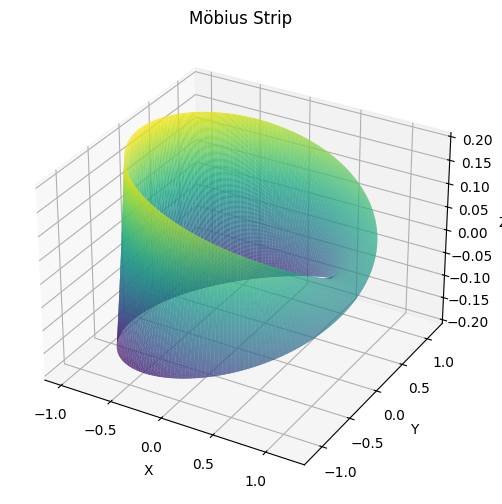

Estimated Surface Area: 2.5171
Estimated Edge Length: 12.6298


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.4, n=200):
        self.R = R
        self.w = w
        self.n = n

        # Create meshgrid
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.u_grid, self.v_grid = np.meshgrid(self.u, self.v)

        # Parametric equations
        self.x = (self.R + self.v_grid * np.cos(self.u_grid / 2)) * np.cos(self.u_grid)
        self.y = (self.R + self.v_grid * np.cos(self.u_grid / 2)) * np.sin(self.u_grid)
        self.z = self.v_grid * np.sin(self.u_grid / 2)

    def compute_surface_area(self):
        dx_du, dx_dv = np.gradient(self.x, self.u, self.v, edge_order=2)
        dy_du, dy_dv = np.gradient(self.y, self.u, self.v, edge_order=2)
        dz_du, dz_dv = np.gradient(self.z, self.u, self.v, edge_order=2)

        # Cross product
        cross_x = dy_du * dz_dv - dz_du * dy_dv
        cross_y = dz_du * dx_dv - dx_du * dz_dv
        cross_z = dx_du * dy_dv - dy_du * dx_dv

        area_density = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)
        du = 2 * np.pi / self.n
        dv = self.w / self.n
        surface_area = np.sum(area_density) * du * dv
        return surface_area

    def compute_edge_length(self):
        # Only using one edge (v = w/2) and doubling it
        x_edge = self.x[0, :]
        y_edge = self.y[0, :]
        z_edge = self.z[0, :]

        dx = np.diff(x_edge)
        dy = np.diff(y_edge)
        dz = np.diff(z_edge)
        distances = np.sqrt(dx**2 + dy**2 + dz**2)
        return 2 * np.sum(distances)

    def plot(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.show()

mobius = MobiusStrip(R=1, w=0.4, n=200)
mobius.plot()

area = mobius.compute_surface_area()
edge_length = mobius.compute_edge_length()

print(f"Estimated Surface Area: {area:.4f}")
print(f"Estimated Edge Length: {edge_length:.4f}")


In [2]:
plt.savefig("mobius_plot.png")


<Figure size 640x480 with 0 Axes>